In [1]:
import pandas as pd
from sklift.models import SoloModel, ClassTransformation

In [44]:
df=pd.read_csv('criteo-uplift-v2.1.csv')
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979587,26.297764,10.059654,9.006250,4.679882,10.280525,4.115453,-3.282109,4.833815,3.839578,13.190056,5.300375,-0.168679,1,0,0,0
13979588,12.642207,10.679513,8.214383,-1.700105,10.280525,3.013064,-13.955150,6.269026,3.971858,13.190056,5.300375,-0.168679,1,0,0,1
13979589,12.976557,10.059654,8.381868,0.842442,11.029584,4.115453,-8.281971,4.833815,3.779212,23.570168,6.169187,-0.168679,1,0,1,0
13979590,24.805064,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


In [3]:
buf1=df[df['treatment'] == 1][:len(df[df['treatment'] == 0])]
buf2=df[df['treatment'] == 0]

In [4]:
buf = pd.concat([buf1, buf2])
df=buf

In [5]:
#def foo(df):
#    columns_list=df.iloc[:, : 12].columns.to_list()
#    for column in columns_list:
#        df[column + '_treatment'] = df[column] * df['treatment']
#foo(df)

In [45]:
#стандартное отклонение у f1, f8, f11, f11_treatment близко к 0 => значения не отличаются друг от друга
#можем их выкинуть из датасета, так как данные неразнообразны
description=df.describe().round(2).T
description

,count,mean,std,min,25%,50%,75%,max
f0,13979592.0,19.62,5.38,12.62,12.62,21.92,24.44,26.75
f1,13979592.0,10.07,0.10,10.06,10.06,10.06,10.06,16.34
f2,13979592.0,8.45,0.30,8.21,8.21,8.21,8.72,9.05
f3,13979592.0,4.18,1.34,-8.40,4.68,4.68,4.68,4.68
f4,13979592.0,10.34,0.34,10.28,10.28,10.28,10.28,21.12
f5,13979592.0,4.03,0.43,-9.01,4.12,4.12,4.12,4.12
f6,13979592.0,-4.16,4.58,-31.43,-6.70,-2.41,0.29,0.29
f7,13979592.0,5.10,1.21,4.83,4.83,4.83,4.83,12.00
f8,13979592.0,3.93,0.06,3.64,3.91,3.97,3.97,3.97
f9,13979592.0,16.03,7.02,13.19,13.19,13.19,13.19,75.30


In [46]:
description[description['std']<description['std']['visit']]['std']

f1            0.10
f8            0.06
f10           0.17
f11           0.02
conversion    0.05
exposure      0.17
Name: std, dtype: float64

In [47]:
df.drop(columns=['f1', 'f8', 'f10', 'f11'], inplace=True)

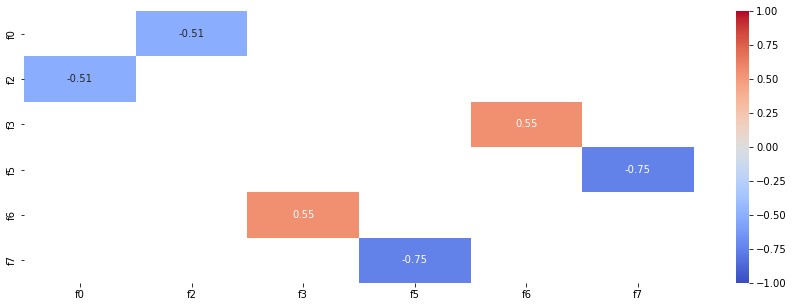

In [48]:
#выведем уровни корреляции между переменными, взаимозависимых переменных нет
import matplotlib.pyplot as plt
import seaborn as sns

dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
for column in filteredDf.columns:
    if filteredDf[column].isna().sum() == len(filteredDf):
        filteredDf=filteredDf.drop(column, axis=1)
        filteredDf=filteredDf.drop(column)
plt.figure(figsize=(15,5))

sns.heatmap(filteredDf, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

In [49]:
X=df.drop(columns=['treatment', 'conversion', 'visit', 'exposure'])
treatment = df[['treatment']]
y=df[['visit']]

In [50]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier


X_train, X_val, treatment_train, treatment_val, y_train, y_val = train_test_split(
    X, treatment, y, test_size=0.2, stratify=df[['visit']], random_state=21)

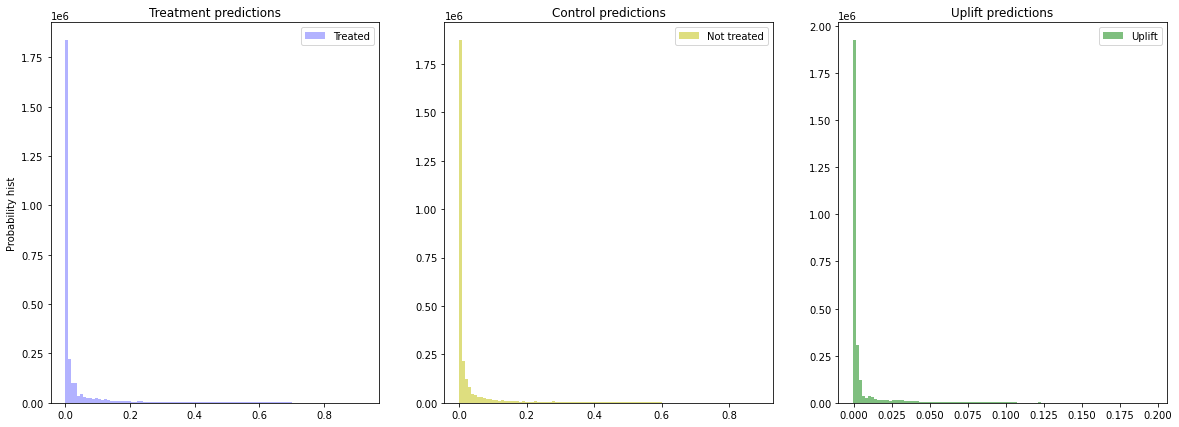

In [51]:
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds

models_results = {
    'approach': [],
    'uplift@30%': []
}

sm = SoloModel(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm = sm.fit(X_train, y_train, treatment_train)

uplift_sm = sm.predict(X_val)
sm_score = uplift_at_k(y_true=y_val, uplift=uplift_sm, treatment=treatment_val, strategy='by_group', k=0.3)

models_results['approach'].append('SoloModel')
models_results['uplift@30%'].append(sm_score)

#вероятность, что человек сделает действие, если мы с ним провзаимодействуем
sm_trmnt_preds = sm.trmnt_preds_

#вероятность, что человек сделает действие, если мы с ним не провзаимодействуем
sm_ctrl_preds = sm.ctrl_preds_

# Отрисуем распределения вероятностей и их разность (uplift)
plot_uplift_preds(trmnt_preds=sm_trmnt_preds, ctrl_preds=sm_ctrl_preds);

In [52]:
# Строим важность признаков:
sm_fi = pd.DataFrame({
    'feature_name': sm.estimator.feature_names_,
    'feature_score': sm.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

sm_fi

,feature_name,feature_score
0,f2,45.009862
1,f9,34.161141
2,f6,9.093031
3,f0,4.767690
4,f3,4.091312
5,f4,1.873937
6,treatment,0.615723
7,f7,0.387303
8,f5,0.000000


In [53]:
from sklift.models import ClassTransformation

sm = ClassTransformation(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm = sm.fit(X_train, y_train, treatment_train)

uplift_sm = sm.predict(X_val)
sm_score = uplift_at_k(y_true=y_val, uplift=uplift_sm, treatment=treatment_val, strategy='by_group', k=0.3)

models_results['approach'].append('ClassTransformation')
models_results['uplift@30%'].append(sm_score)

In [54]:
k=0.1

uplift_overall = uplift_at_k(y_val, uplift_sm, treatment_val, strategy='overall', k=k)

# strategy='by_group' sort by uplift treatment and control separately
uplift_bygroup = uplift_at_k(y_val, uplift_sm, treatment_val, strategy='by_group', k=k)


print(f"uplift@{k * 100:.0f}%: {uplift_overall:.4f} (sort groups by uplift together)")
print(f"uplift@{k * 100:.0f}%: {uplift_bygroup:.4f} (sort groups by uplift separately)")

uplift@10%: 0.0508 (sort groups by uplift together)
uplift@10%: 0.0690 (sort groups by uplift separately)


In [55]:
from sklift.metrics import uplift_by_percentile

uplift_by_percentile(y_val, uplift_sm, treatment_val, 
                     strategy='overall', 
                     total=True, std=True, bins=10)

/Users/olgakalinina/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,240689,38903,0.357981,0.307174,0.050806,0.000977,0.002339,0.002535
10-20,238155,41437,0.074510,0.059729,0.014781,0.000538,0.001164,0.001283
20-30,237131,42461,0.025724,0.022209,0.003516,0.000325,0.000715,0.000786
30-40,236754,42838,0.011007,0.008591,0.002417,0.000214,0.000446,0.000495
40-50,236791,42801,0.005021,0.003177,0.001844,0.000145,0.000272,0.000308
50-60,237174,42418,0.002707,0.001886,0.000821,0.000107,0.000211,0.000236
60-70,237103,42489,0.000806,0.000400,0.000405,0.000058,0.000097,0.000113
70-80,237240,42352,0.001206,0.000708,0.000497,0.000071,0.000129,0.000148
80-90,237292,42300,0.000421,0.000426,-0.000004,0.000042,0.000100,0.000109


In [56]:
from sklift.metrics import weighted_average_uplift

uplift_full_data = weighted_average_uplift(y_val, uplift_sm, treatment_val, bins=10) 
print(f"average uplift on full data: {uplift_full_data:.4f}")

average uplift on full data: 0.0076


/Users/olgakalinina/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


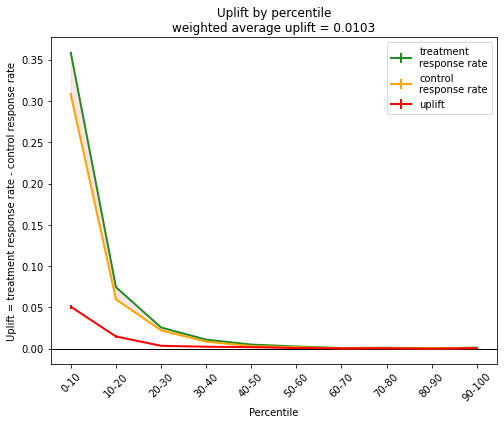

In [57]:
from sklift.viz import plot_uplift_by_percentile

# line plot
plot_uplift_by_percentile(y_val, uplift_sm, treatment_val, strategy='overall', kind='line');

In [70]:
import matplotlib.pyplot as plt
import numpy as np

from sklift.metrics import uplift_at_k

uplift_transform_model_val = sm.predict(X_val)
uplift_transform_model_train = sm.predict(X_train)


values_uplift_k_transform = []
values_uplift_k_two = []
values_k = []
for k in np.arange(0.01,1,0.01):
    values_uplift_k_transform.append(uplift_at_k(y_val, uplift_transform_model_val, treatment_val, strategy='overall', k=k))
    values_k.append(k)

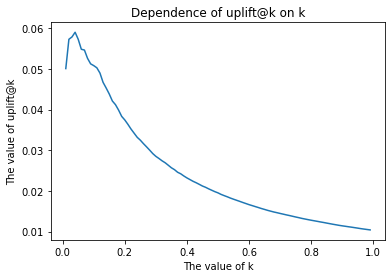

In [71]:
plt.plot(values_k, values_uplift_k_transform)
plt.title('Dependence of uplift@k on k')
plt.xlabel('The value of k')
plt.ylabel('The value of uplift@k')
plt.show()

/Users/olgakalinina/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


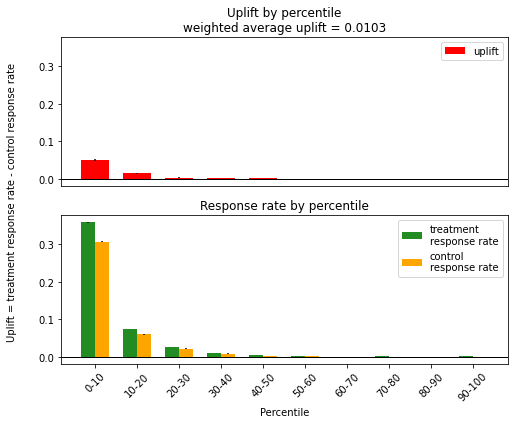

In [66]:
plot_uplift_by_percentile(y_val, uplift_sm, treatment_val, strategy='overall', kind='bar');

In [ ]:
from sklift.models import TwoModels

tm = TwoModels(
    estimator_trmnt=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    method='vanilla'
)
tm = tm.fit(X_train, y_train, treatment_train)
uplift_tm = tm.predict(X_val)

tm_score = uplift_at_k(y_true=y_val, uplift=uplift_tm, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('TwoModels')
models_results['uplift@30%'].append(tm_score)

plot_uplift_preds(trmnt_preds=tm.trmnt_preds_, ctrl_preds=tm.ctrl_preds_);

In [ ]:
tm_ctrl = TwoModels(
    estimator_trmnt=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    method='ddr_control'
)

tm_ctrl = tm_ctrl.fit(
    X_train, y_train, treatment_train
)

uplift_tm_ctrl = tm_ctrl.predict(X_val)

tm_ctrl_score = uplift_at_k(y_true=y_val, uplift=uplift_tm_ctrl, treatment=treatment_val, strategy='by_group', k=0.3)

models_results['approach'].append('TwoModels_ddr_control')
models_results['uplift@30%'].append(tm_ctrl_score)

plot_uplift_preds(trmnt_preds=tm_ctrl.trmnt_preds_, ctrl_preds=tm_ctrl.ctrl_preds_);

In [ ]:
tm_trmnt = TwoModels(
    estimator_trmnt=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    method='ddr_treatment'
)
tm_trmnt = tm_trmnt.fit(
    X_train, y_train, treat_train
)

uplift_tm_trmnt = tm_trmnt.predict(X_val)

tm_trmnt_score = uplift_at_k(y_true=y_val, uplift=uplift_tm_trmnt, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('TwoModels_ddr_treatment')
models_results['uplift@30%'].append(tm_trmnt_score)

plot_uplift_preds(trmnt_preds=tm_trmnt.trmnt_preds_, ctrl_preds=tm_trmnt.ctrl_preds_);

In [ ]:
pd.DataFrame(data=models_results).sort_values('uplift@30%', ascending=False)